<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Importing modules
    </div>

In [33]:
import numpy as np
import pandas as pd
np.random.seed(0)

from improve.src.utils import get_repo_root

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Load data</div>

In [42]:
data = pd.read_csv(f'{get_repo_root()}/data/sample_submission.csv')
col_names = data.columns[2:].values
important_cols = set(["BOD5_5", "O2_1", "O2_2"])
non_important_cols = set(col_names) - set(["BOD5_5", "O2_1", "O2_2"])

In [45]:
# make all cols but important_cols to be 0
data.loc[:, non_important_cols] = 0

/tmp/ipykernel_14460/3603321022.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data.loc[:, non_important_cols] = 0
/tmp/ipykernel_14460/3603321022.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data.loc[:, non_important_cols] = 0
/tmp/ipykernel_14460/3603321022.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, non_important_cols] = 0


RMSE: 1.0616184873539491


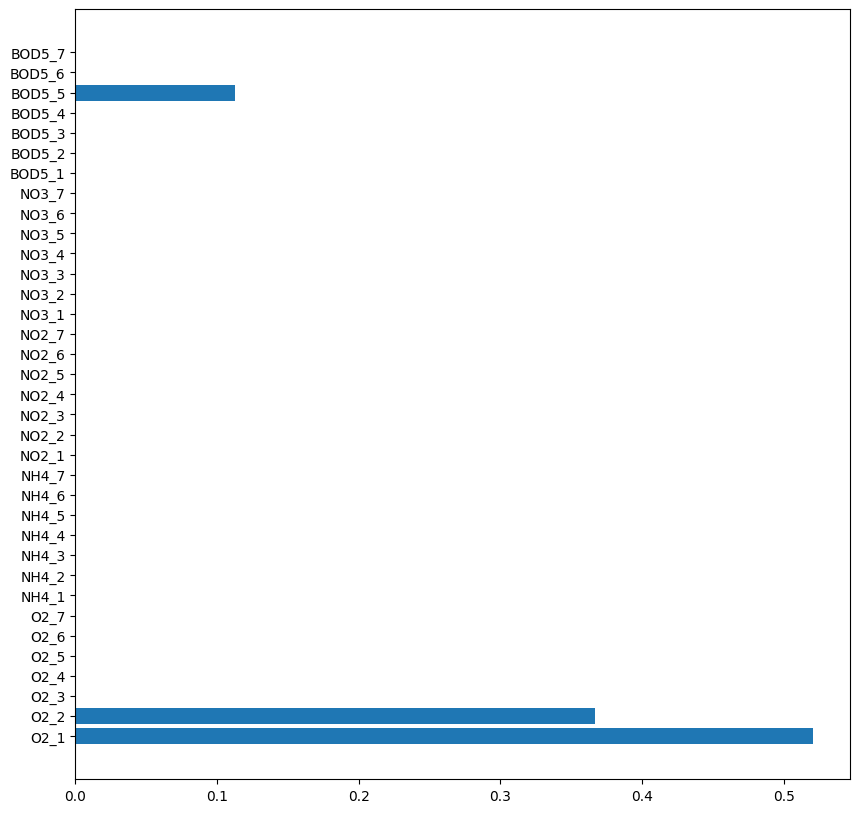

In [47]:
# Train random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = data[col_names]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error

print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')

# Show most important features
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.barh(col_names, rf.feature_importances_)
plt.show()


In [48]:
data.to_csv(f'{get_repo_root()}/data/sample_submission_out.csv', index=False)